In [202]:
import os
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import NearestNeighbors

In [203]:
with open('checkpoint_fold_9.pkl', 'rb') as f:
    d = pickle.load(f)

In [204]:
df = pd.DataFrame(d)
# df[df["metric_name"]=="adjusted cosine"]
df_CV = df\
    .groupby(
        [
            "metric_name",
            "n_neighbors"
        ]
    )\
    .agg(
        {
            "rmse": lambda x: np.linalg.norm(x, 2) / np.sqrt(len(x)),
            "mae": "mean"
        }
    )
metric_names = sorted(list(set(x[0] for x in df_CV.index)))
rmse_CV = df_CV.loc[:, "rmse"].unstack(1)
mae_CV = df_CV.loc[:, "mae"].unstack(1)

In [205]:
rmse_CV

n_neighbors,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
metric_name,,,,,,,,,,,,,,,,,,,,,
adjusted cosine,1.063885,1.060387,1.055993,1.051000,1.045731,1.040840,1.035744,1.030622,1.025982,1.021366,...,0.852963,0.852698,0.852426,0.852174,0.851927,0.851679,0.851408,0.851156,0.850920,0.850663
cosine,1.152256,1.155084,1.151229,1.146190,1.141578,1.136823,1.132753,1.129303,1.125989,1.122822,...,1.030117,1.029963,1.029799,1.029667,1.029523,1.029396,1.029304,1.029188,1.029047,1.028905
deduct 2.5,1.089678,1.088389,1.084856,1.080888,1.077294,1.073596,1.070397,1.067162,1.064275,1.061756,...,0.978119,0.977995,0.977872,0.977768,0.977642,0.977527,0.977394,0.977284,0.977152,0.977043
deduct 2.75,1.076019,1.072272,1.068029,1.063904,1.059999,1.056212,1.052720,1.049692,1.046769,1.043931,...,0.958558,0.958427,0.958313,0.958203,0.958092,0.957964,0.957825,0.957702,0.957562,0.957435
deduct 2.9,1.066720,1.060687,1.055665,1.051404,1.047135,1.043088,1.039581,1.036095,1.033147,1.030483,...,0.941783,0.941667,0.941498,0.941400,0.941271,0.941138,0.941032,0.940928,0.940789,0.940663
deduct 3,1.059533,1.052213,1.046505,1.041575,1.037256,1.032833,1.029176,1.025804,1.022828,1.019842,...,0.928058,0.927893,0.927756,0.927628,0.927506,0.927387,0.927246,0.927126,0.927006,0.926884
"remap 1,5->-+1, 24->-+0.5, 3->0.25",1.079317,1.076522,1.072671,1.068793,1.065051,1.061085,1.057562,1.054399,1.051558,1.048811,...,0.961283,0.961142,0.961020,0.960910,0.960781,0.960665,0.960541,0.960415,0.960269,0.960155
"remap 12->-1, 345->1",1.122643,1.122702,1.118110,1.113528,1.109098,1.105013,1.101368,1.098523,1.095589,1.093247,...,1.005748,1.005596,1.005460,1.005349,1.005214,1.005079,1.004940,1.004796,1.004657,1.004525


In [206]:
mae_CV

n_neighbors,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
metric_name,,,,,,,,,,,,,,,,,,,,,
adjusted cosine,0.863119,0.855670,0.848845,0.842310,0.836167,0.830523,0.825140,0.819918,0.815212,0.810628,...,0.670370,0.670176,0.669982,0.669791,0.669627,0.669473,0.669269,0.669085,0.668924,0.668747
cosine,0.918660,0.916310,0.911189,0.905747,0.901355,0.896881,0.893306,0.890186,0.887282,0.884544,...,0.814221,0.814120,0.814001,0.813907,0.813805,0.813704,0.813640,0.813565,0.813456,0.813357
deduct 2.5,0.872106,0.864904,0.858715,0.853480,0.849116,0.845005,0.841580,0.838368,0.835594,0.833158,...,0.768180,0.768097,0.768020,0.767954,0.767871,0.767794,0.767708,0.767632,0.767555,0.767480
deduct 2.75,0.861470,0.852049,0.845216,0.839729,0.835085,0.830893,0.827088,0.823923,0.821089,0.818330,...,0.752021,0.751950,0.751891,0.751821,0.751748,0.751661,0.751566,0.751493,0.751408,0.751327
deduct 2.9,0.854039,0.842778,0.835256,0.829600,0.824626,0.820155,0.816404,0.812892,0.809906,0.807342,...,0.738419,0.738350,0.738245,0.738195,0.738124,0.738037,0.737964,0.737913,0.737821,0.737745
deduct 3,0.848246,0.836032,0.827981,0.821680,0.816513,0.811701,0.807880,0.804436,0.801453,0.798650,...,0.727221,0.727112,0.727030,0.726945,0.726871,0.726795,0.726701,0.726625,0.726546,0.726472
"remap 1,5->-+1, 24->-+0.5, 3->0.25",0.863985,0.855834,0.849609,0.844619,0.840218,0.835954,0.832320,0.829188,0.826440,0.823902,...,0.757916,0.757836,0.757764,0.757700,0.757616,0.757543,0.757472,0.757387,0.757296,0.757226
"remap 12->-1, 345->1",0.904230,0.899138,0.892716,0.886991,0.882091,0.877743,0.874078,0.871099,0.868204,0.865841,...,0.797728,0.797624,0.797532,0.797460,0.797377,0.797288,0.797194,0.797094,0.796996,0.796912


The MAE are still decreasing for each metric even setting n_neighbors to 200, but the curve is flattened out (see below).

The best metric with best MAE, RMSE seems to be the `adjusted cosine`. `deduct 3` has the best next performance in these two metrics. 

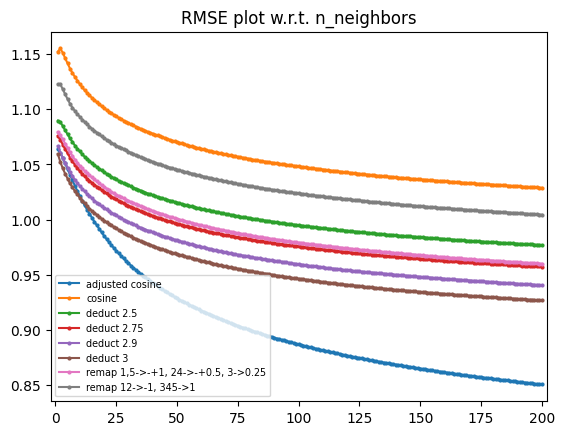

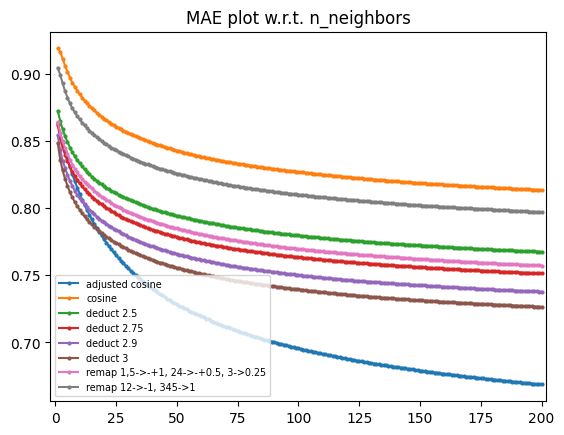

In [207]:
ax = plt.gca()
ax.set_title("RMSE plot w.r.t. n_neighbors")
for metric_name in rmse_CV.index:
    ax.plot(rmse_CV.loc[metric_name], marker='.', markersize=4, label=metric_name)
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()
ax = plt.gca()
ax.set_title("MAE plot w.r.t. n_neighbors")
for metric_name in mae_CV.index:
    ax.plot(mae_CV.loc[metric_name], marker='.', markersize=4, label=metric_name)
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()